In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
import tensorflow as tf
from tensorflow import keras

In [5]:
#Loading Dataset

digit_mnist=keras.datasets.mnist
(X_train_full,y_train_full),(X_test,y_test)=digit_mnist.load_data()

In [6]:
#Data reshaping

X_train_full=X_train_full.reshape((60000,28,28,1))
X_test=X_test.reshape((10000,28,28,1))

In [7]:
#Data Normalization

X_train_n=X_train_full/255.  ## here we dividing with 255. to get float valu
X_test_n=X_test/255.

In [8]:
#Creating Validation Set

X_valid,X_train=X_train_n[:6000],X_train_n[6000:]
y_valid,y_train=y_train_full[:6000],y_train_full[6000:]
X_test=X_test_n

In [9]:
np.random.seed(42)
tf.random.set_seed(42)

In [10]:
#Model 

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(filters=32,kernel_size=(3,3),strides=1,padding='valid',activation='relu',input_shape=(28,28,1)))
model.add(keras.layers.MaxPooling2D((2,2)))

In [11]:
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(200,activation='relu')) #Hidden Layer 1
model.add(keras.layers.Dense(100,activation='relu'))  # Hidden Layer 2

model.add(keras.layers.Dense(10,activation='softmax')) #output Layer

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 200)               1081800   
                                                                 
 dense_1 (Dense)             (None, 100)               20100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                        

In [13]:
model.compile(loss='sparse_categorical_crossentropy',
             optimizer='sgd',
             metrics=['accuracy']
)


In [14]:
model_history=model.fit(X_train,y_train,epochs=20,batch_size=60,
                       validation_data=(X_valid,y_valid))

Epoch 1/20
900/900 [==============================] - 18s 20ms/step - loss: 0.7164 - accuracy: 0.8158 - val_loss: 0.2823 - val_accuracy: 0.9172
Epoch 2/20
900/900 [==============================] - 16s 18ms/step - loss: 0.2650 - accuracy: 0.9213 - val_loss: 0.2149 - val_accuracy: 0.9398
Epoch 3/20
900/900 [==============================] - 16s 18ms/step - loss: 0.2037 - accuracy: 0.9392 - val_loss: 0.1697 - val_accuracy: 0.9495
Epoch 4/20
900/900 [==============================] - 18s 20ms/step - loss: 0.1667 - accuracy: 0.9495 - val_loss: 0.1407 - val_accuracy: 0.9595
Epoch 5/20
900/900 [==============================] - 18s 20ms/step - loss: 0.1414 - accuracy: 0.9573 - val_loss: 0.1237 - val_accuracy: 0.9633
Epoch 6/20
900/900 [==============================] - 18s 20ms/step - loss: 0.1229 - accuracy: 0.9632 - val_loss: 0.1135 - val_accuracy: 0.9665
Epoch 7/20
900/900 [==============================] - 19s 21ms/step - loss: 0.1093 - accuracy: 0.9680 - val_loss: 0.1010 - val_accuracy:

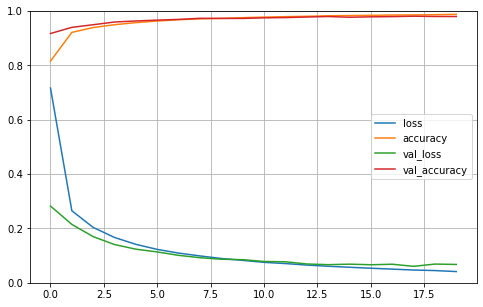

In [15]:
pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [16]:
ev=model.evaluate(X_test_n,y_test)
ev

313/313 [==============================] - 2s 5ms/step - loss: 0.0671 - accuracy: 0.9784


[0.06714943796396255, 0.9783999919891357]

In [17]:
X_new=X_test[:3]
